In [9]:
# modules for ploting and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [10]:
# for the pca analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# The k-means algorithm
from sklearn.cluster import KMeans

## Get the data

In [11]:
# Get the data from the other notebook
%store -r data
%store -r columns
%store -r eco

## Do PCA mojo

In [12]:
# get the data to pass to the pca
x = data[columns].values

# stransforming the data
x = StandardScaler().fit_transform(x)

# fiting
pca = PCA().fit(x)

### Graphs

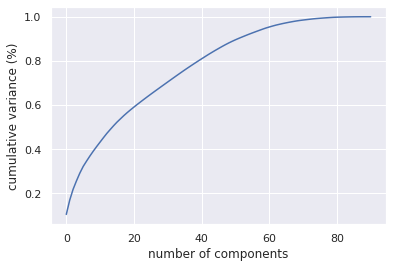

In [13]:
# Cemulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance (%)')

plt.savefig('../graphs/cumulative-variance.png')

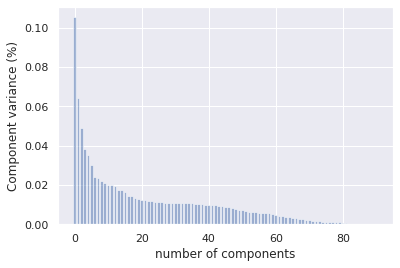

In [14]:
# Variance by component
plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('number of components')
plt.ylabel('Component variance (%)')

plt.savefig('../graphs/component-variance.png')

### Determine the number of Clusters using k-means

In [15]:
# in our case we need to take the first 60 component
# go back to the cumulative variance graph
pca = PCA(n_components = 60)

# stransforming the data
pca_scores = pca.fit_transform(x)

In [29]:
# Get the number of cluster to take
WCSS = list()
for clusters in range(1, 11):
    kmeans = KMeans(n_clusters=clusters, init='k-means++', random_state=42)
    
    # WCSS: Within Cluster Sum of Squares
    kmeans.fit(pca_scores)
    WCSS.append(kmeans.inertia_)
    
    print(clusters)

1
2
3
4
5
6
7
8
9
10


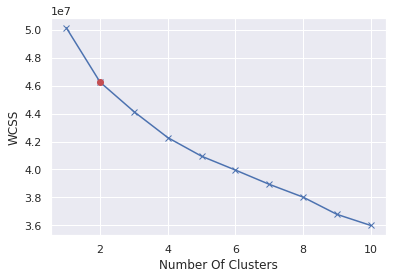

In [33]:
# plot the results
plt.plot(range(1, 11), WCSS, 'bx-')
plt.plot([2], WCSS[1], 'ro')  # c='r', marker='o'
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')

# Elbow Method For Optimal k
plt.savefig('../graphs/wcss.png')

In [16]:
# now dvide into two groups and label them
clusters = 2
kmeans = KMeans(n_clusters=clusters, init='k-means++')
kmeans.fit(pca_scores)

KMeans(n_clusters=2)

In [17]:
data['Cluster'] = kmeans.labels_

In [18]:
data['Cluster'].value_counts()

0    307663
1    273115
Name: Cluster, dtype: int64

In [19]:
data['Cluster'].value_counts(normalize=True)

0    0.529743
1    0.470257
Name: Cluster, dtype: float64